In [1]:
import shutil
import warnings

warnings.filterwarnings('ignore')

import os

import numpy as np
import torch

import stMask as stm
from pathlib import Path
import scanpy as sc
import pandas as pd
from sklearn import metrics


def train_one(args, adata, tissue_name=' '):
    net = stm.stMASK(adata,
                     tissue_name=tissue_name,
                     num_clusters=args.n_clusters,
                     genes_model='pca',
                     top_genes=args.top_genes,
                     rad_cutoff=200,
                     k_cutoff=args.k_cutoff,
                     graph_model='KNN',
                     device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'),
                     learning_rate=args.learning_rate,
                     weight_decay=args.weight_decay,
                     max_epoch=args.max_epoch,
                     gradient_clipping=args.gradient_clipping,
                     feat_mask_rate=args.feat_mask_rate,
                     edge_drop_rate=args.edge_drop_rate,
                     hidden_dim=args.hidden_dim,
                     latent_dim=args.latent_dim,
                     bn=args.bn,
                     att_dropout_rate=args.att_dropout_rate,
                     fc_dropout_rate=args.fc_dropout_rate,
                     use_token=args.use_token,
                     rep_loss=args.rep_loss,
                     rel_loss=args.rel_loss,
                     alpha=args.alpha,
                     lam=args.lam,
                     random_seed=args.seed,
                     nps=args.nps)
    net.train()
    method = "kmeans"
    net.process(method=method)
    # net.clustering(method=method)
    adata = net.get_adata()
    sub_adata = adata[~pd.isnull(adata.obs['Ground Truth'])]
    ARI = metrics.adjusted_rand_score(sub_adata.obs['Ground Truth'], sub_adata.obs[method])
    NMI = metrics.normalized_mutual_info_score(sub_adata.obs['Ground Truth'], sub_adata.obs[method])
    print(f"ARI:{ARI}\tNMI:{NMI}")
    return ARI, NMI, adata

adata.obsm['feat'].shape:(4226, 200)
------Calculating spatial graph...
The graph contains 50712 edges, 4226 cells.
12.0000 neighbors per cell on average.
(4226, 200)


Dataset_Name:151507, Ep 499: train loss:0.4711: 100%|██████████| 500/500 [00:07<00:00, 66.16it/s]


ARI:0.6283789830452764	NMI:0.7307715057788814
adata.obsm['feat'].shape:(4384, 200)
------Calculating spatial graph...
The graph contains 52608 edges, 4384 cells.
12.0000 neighbors per cell on average.
(4384, 200)


Dataset_Name:151508, Ep 499: train loss:0.4787: 100%|██████████| 500/500 [00:07<00:00, 64.00it/s]


ARI:0.5272337987830417	NMI:0.6663179964859179
adata.obsm['feat'].shape:(4789, 200)
------Calculating spatial graph...
The graph contains 57468 edges, 4789 cells.
12.0000 neighbors per cell on average.
(4789, 200)


Dataset_Name:151509, Ep 499: train loss:0.4562: 100%|██████████| 500/500 [00:08<00:00, 60.77it/s]


ARI:0.5947877056717475	NMI:0.7067211663270846
adata.obsm['feat'].shape:(4634, 200)
------Calculating spatial graph...
The graph contains 55608 edges, 4634 cells.
12.0000 neighbors per cell on average.
(4634, 200)


Dataset_Name:151510, Ep 499: train loss:0.4687: 100%|██████████| 500/500 [00:08<00:00, 61.67it/s]


ARI:0.48294700732235246	NMI:0.6512935262833726
adata.obsm['feat'].shape:(3661, 200)
------Calculating spatial graph...
The graph contains 43932 edges, 3661 cells.
12.0000 neighbors per cell on average.
(3661, 200)


Dataset_Name:151669, Ep 499: train loss:0.4783: 100%|██████████| 500/500 [00:07<00:00, 70.03it/s]


ARI:0.48421621942590853	NMI:0.6156106636470612
adata.obsm['feat'].shape:(3498, 200)
------Calculating spatial graph...
The graph contains 41976 edges, 3498 cells.
12.0000 neighbors per cell on average.
(3498, 200)


Dataset_Name:151670, Ep 499: train loss:0.5051: 100%|██████████| 500/500 [00:07<00:00, 70.50it/s]


ARI:0.28348244923541893	NMI:0.47705826525414324
adata.obsm['feat'].shape:(4110, 200)
------Calculating spatial graph...
The graph contains 49320 edges, 4110 cells.
12.0000 neighbors per cell on average.
(4110, 200)


Dataset_Name:151671, Ep 499: train loss:0.4817: 100%|██████████| 500/500 [00:07<00:00, 64.12it/s]


ARI:0.665735859184366	NMI:0.7310212458891461
adata.obsm['feat'].shape:(4015, 200)
------Calculating spatial graph...
The graph contains 48180 edges, 4015 cells.
12.0000 neighbors per cell on average.
(4015, 200)


Dataset_Name:151672, Ep 499: train loss:0.4799: 100%|██████████| 500/500 [00:07<00:00, 66.14it/s]


ARI:0.6538913679982818	NMI:0.7118414094636585
adata.obsm['feat'].shape:(3639, 200)
------Calculating spatial graph...
The graph contains 43668 edges, 3639 cells.
12.0000 neighbors per cell on average.
(3639, 200)


Dataset_Name:151673, Ep 499: train loss:0.3723: 100%|██████████| 500/500 [00:07<00:00, 70.20it/s]


ARI:0.5870519889696478	NMI:0.725959935498293
adata.obsm['feat'].shape:(3673, 200)
------Calculating spatial graph...
The graph contains 44076 edges, 3673 cells.
12.0000 neighbors per cell on average.
(3673, 200)


Dataset_Name:151674, Ep 499: train loss:0.3658: 100%|██████████| 500/500 [00:06<00:00, 71.45it/s]


ARI:0.5954138985257272	NMI:0.7331133944194519
adata.obsm['feat'].shape:(3592, 200)
------Calculating spatial graph...
The graph contains 43104 edges, 3592 cells.
12.0000 neighbors per cell on average.
(3592, 200)


Dataset_Name:151675, Ep 499: train loss:0.4023: 100%|██████████| 500/500 [00:06<00:00, 72.54it/s]


ARI:0.5912407742391963	NMI:0.7165130107956185
adata.obsm['feat'].shape:(3460, 200)
------Calculating spatial graph...
The graph contains 41520 edges, 3460 cells.
12.0000 neighbors per cell on average.
(3460, 200)


Dataset_Name:151676, Ep 499: train loss:0.4241: 100%|██████████| 500/500 [00:06<00:00, 73.14it/s]


ARI:0.5993240582278032	NMI:0.7031956269742256
mid_ari:0.5930142399554719	mid_nmi:0.7092812878953716


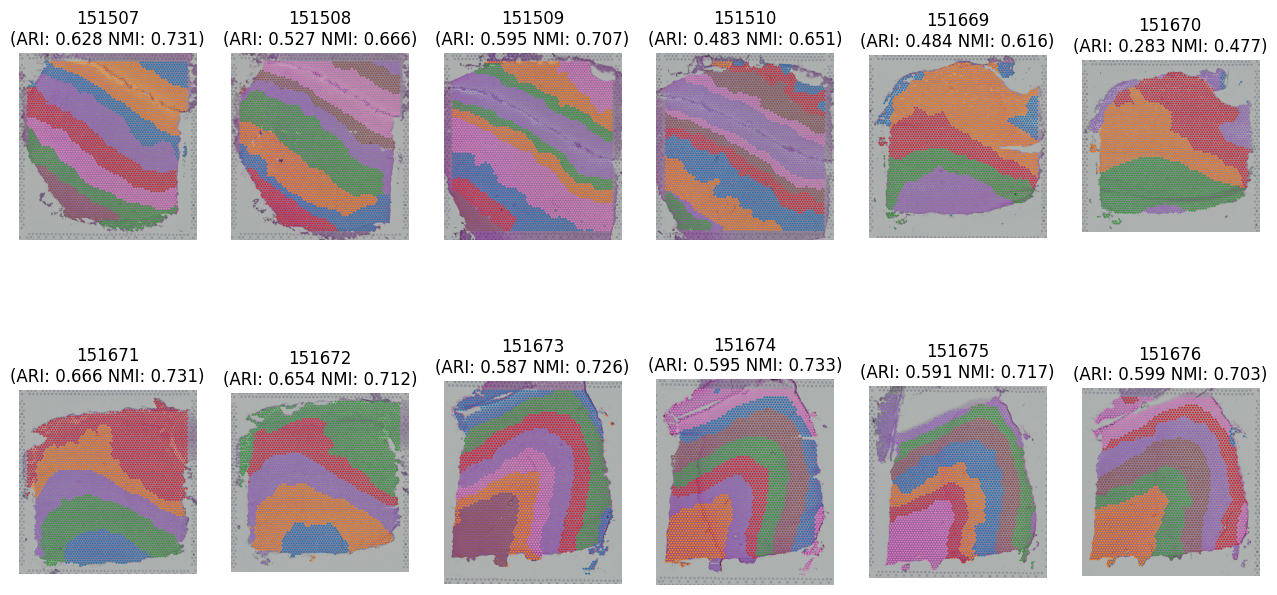

In [4]:
import matplotlib.pyplot as plt


def draw_cluster_spatial(adata, ax, name, title, ARI, NMI, legend_loc='lower right'):
    sc.pl.spatial(adata, color=[name], show=False, ax=ax, legend_loc=legend_loc)
    ax.axis('off')
    ax.set_title('%s\n(ARI: %.3f NMI: %.3f)' % (title, ARI, NMI))


fig, axs = plt.subplots(2, 6, figsize=(16, 8))
ari_list = []
nmi_list = []
args = stm.utils.build_args()
args.hidden_dim, args.latent_dim = 512, 256
args.max_epoch = 500
args.lam = 1.3
args.feat_mask_rate = 0.2
args.edge_drop_rate = 0.2
args.top_genes = 2000
args.k_cutoff = 12
section_id = ["151507", "151508", "151509", "151510", "151669", "151670", "151671", "151672",
              "151673", "151674", "151675", "151676"]
for id, tissue_name in enumerate(section_id):
    n_clusters = 5 if tissue_name in ['151669', '151670', '151671', '151672'] else 7
    args.n_clusters = n_clusters

    data_root = Path("D:\\project\\datasets\\DLPFC\\")
    count_file = tissue_name + "_filtered_feature_bc_matrix.h5"
    adata = sc.read_visium(data_root / tissue_name, count_file=count_file)
    truth_path = "D:\\project\\datasets\\DLPFC\\" + tissue_name + '/' + tissue_name + '_truth.txt'
    Ann_df = pd.read_csv(truth_path, sep='\t', header=None, index_col=0)
    Ann_df.columns = ['Ground Truth']
    adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'Ground Truth']

    ARI, NMI, adata = train_one(args, adata, tissue_name)
    ari_list.append(ARI)
    nmi_list.append(NMI)
    draw_cluster_spatial(adata, ax=axs[id // 6,id % 6], name='kmeans', title=tissue_name, ARI=ARI, NMI=NMI, legend_loc=None)
mid_ari = np.median(ari_list)
mid_nmi = np.median(nmi_list)
print(f"mid_ari:{mid_ari}\tmid_nmi:{mid_nmi}")